In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('adult.data', sep=',', names=["age","workclass","fnlwgt","education","education-num","marital-status",
                                              "occupation","relationship","race","sex","capital-gain","capital-loss",
                                               "hours-per-week","native-country", "income"])
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Data Cleaning

In [3]:
df.shape

(32561, 15)

In [4]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [5]:
df_obj = df.select_dtypes(['object'])
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

In [6]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [7]:
c = ['?']
df.isin(c).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [8]:
#looks like all the unkown occupation people also have unkown workclass, this can be dropped

In [9]:
print('workclass')
print(df.loc[df['workclass']=='?'].index)
print('occupation')
print(df.loc[df['occupation']=='?'].index)

workclass
Int64Index([   27,    61,    69,    77,   106,   128,   149,   154,   160,
              187,
            ...
            32426, 32477, 32490, 32494, 32525, 32530, 32531, 32539, 32541,
            32542],
           dtype='int64', length=1836)
occupation
Int64Index([   27,    61,    69,    77,   106,   128,   149,   154,   160,
              187,
            ...
            32426, 32477, 32490, 32494, 32525, 32530, 32531, 32539, 32541,
            32542],
           dtype='int64', length=1843)


In [10]:
drop_row = ['workclass', 'occupation', 'native-country']
for i in drop_row:
    df.drop(df.loc[df[i]=='?'].index, inplace=True)

In [11]:
df.shape

(30162, 15)

In [12]:
c = ['?']
df.isin(c).sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'capital-gain'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'education-num'}>],
       [<AxesSubplot:title={'center':'fnlwgt'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>]], dtype=object)

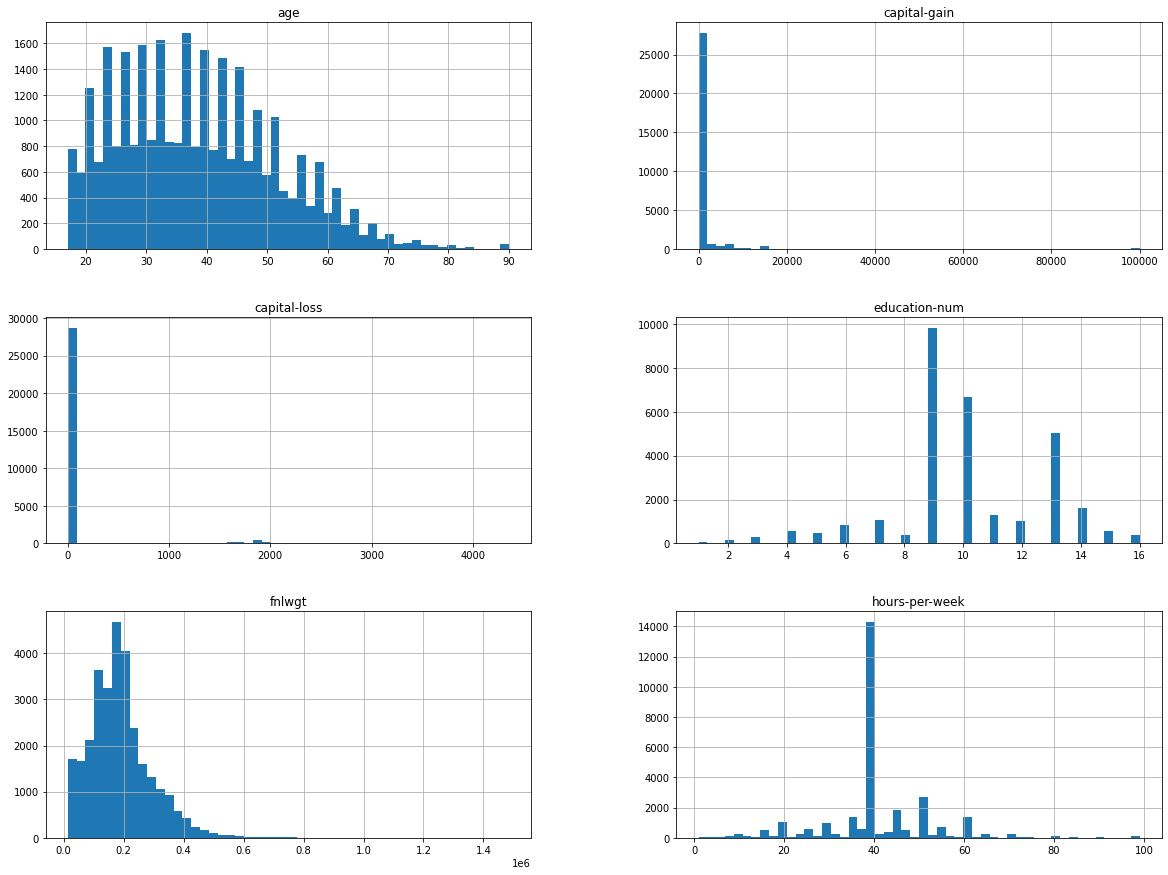

In [13]:
df.hist(bins=50, figsize=(20,15))

In [14]:
int_col = []
obj_col = []
for i in df.columns:
    if(str(df[i].dtypes) == 'int64'):
        int_col.append(i)
    elif(i != 'income' and i!='education'):
        obj_col.append(i)
print(int_col)
print(obj_col)

['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


### Processing data for Machine Learning

In [15]:
df_processed = df.copy()
df_processed.drop(columns=['education'],inplace=True)

In [16]:
df_processed.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [17]:
df_processed = pd.get_dummies(df_processed, columns=obj_col, drop_first=False)
df_processed = pd.get_dummies(df_processed, columns=['income'], drop_first=True)

In [18]:
df_processed['income_>50K'].value_counts()

0    22654
1     7508
Name: income_>50K, dtype: int64

<AxesSubplot:>

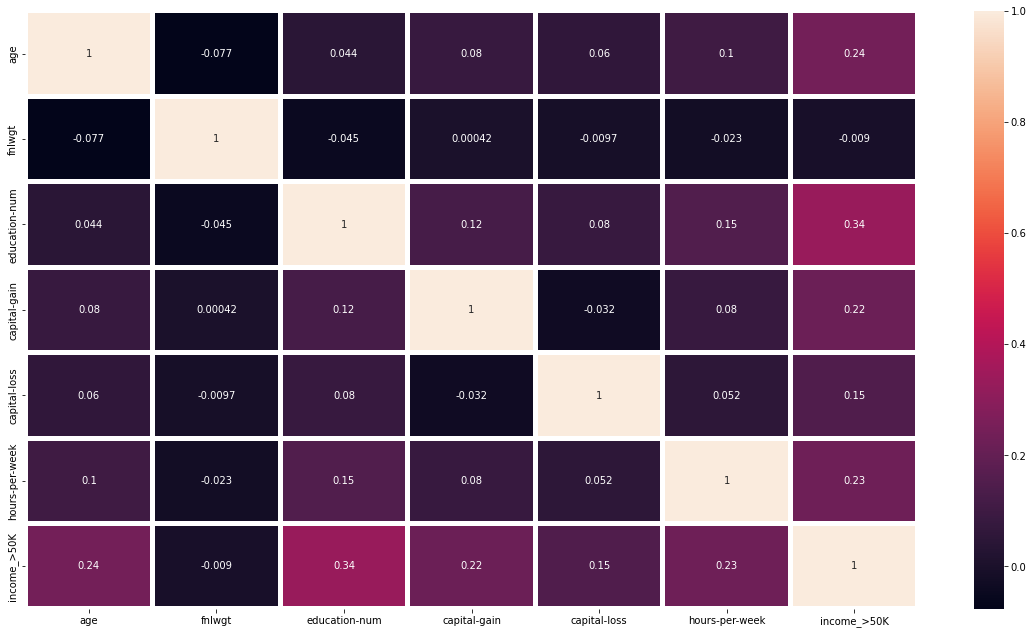

In [19]:
int_col.append('income_>50K')
plt.figure(figsize = (20,11))
sns.heatmap(df_processed.loc[:,int_col].astype(float).corr(), annot=True, lw=4)

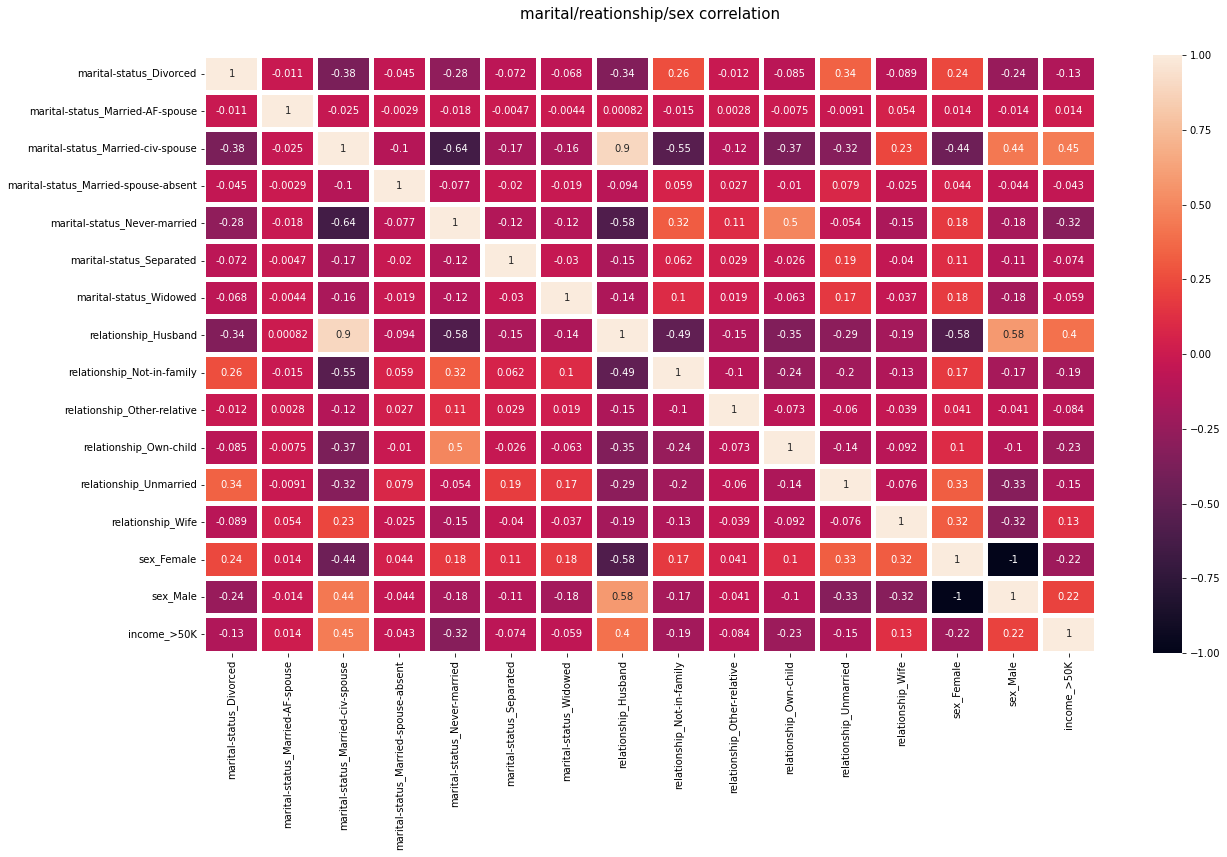

In [20]:
plt.figure(figsize = (20,11))
sns.heatmap(df_processed.loc[:, df_processed.columns.str.contains('marital-status') | 
                             df_processed.columns.str.contains('relationship') |
                            df_processed.columns.str.contains('sex') | df_processed.columns.str.contains('income')].corr(), annot=True, lw=4)
plt.title('marital/reationship/sex correlation', y=1.05, size =15)
plt.show()

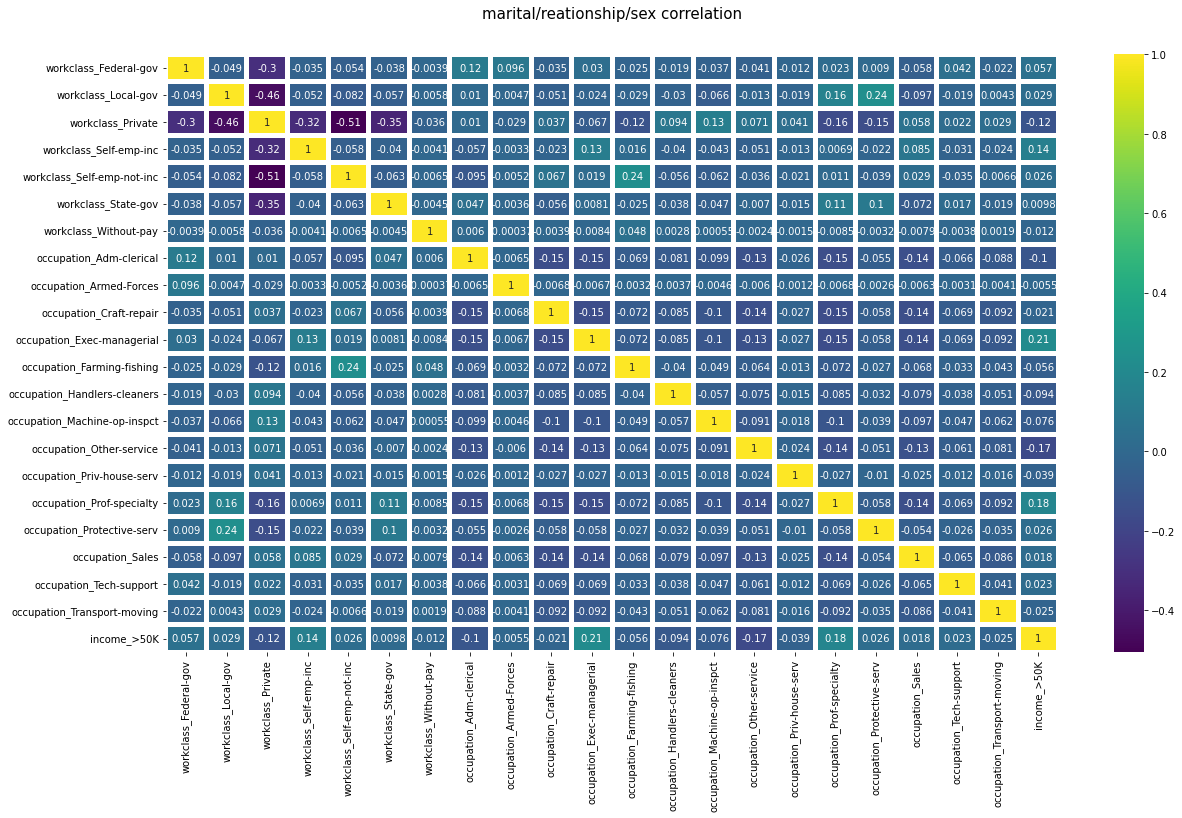

In [21]:
plt.figure(figsize = (20,11))
sns.heatmap(df_processed.loc[:, df_processed.columns.str.contains('workclass') | 
                             df_processed.columns.str.contains('occupation') | df_processed.columns.str.contains('income')].corr(), 
            annot=True, lw=4, cmap = plt.cm.viridis)
plt.title('marital/reationship/sex correlation', y=1.05, size =15)
plt.show()

In [22]:
#looks like there are some co-correlated features so let's do some feature selection to find the best one

### Feature selection 

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import numpy as np

In [24]:
features_name = [i for i in df_processed.columns if (i != 'income_>50K')]
x = df_processed[features_name]
y = df_processed['income_>50K']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
x_train.shape, x_test.shape

((24129, 88), (6033, 88))

### Feature selection by using feature importance from random forest classifier

In [26]:
sel = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=3, n_jobs=-1))
sel.fit(x_train, y_train)
sel.get_support()

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [27]:
#used features that were only selected by the feature importance feature selection
features = x_train.columns[sel.get_support()]
#average mean that has to be bigger for feature to be selected
print(np.mean(sel.estimator_.feature_importances_))
sel.estimator_.feature_importances_


0.011363636363636364


array([1.52846489e-01, 1.64460411e-01, 1.14244923e-01, 9.62361739e-02,
       3.26621726e-02, 8.33805929e-02, 5.39465054e-03, 5.37177540e-03,
       9.53119674e-03, 6.09683278e-03, 8.32209608e-03, 4.37876812e-03,
       1.06908996e-04, 5.55589069e-03, 3.60080168e-04, 6.67740635e-02,
       8.38931560e-04, 2.36744471e-02, 1.84088218e-03, 1.56994252e-03,
       5.13590906e-03, 2.28692807e-05, 6.27337507e-03, 1.91052865e-02,
       4.79443581e-03, 3.36773031e-03, 4.16387008e-03, 7.52994011e-03,
       1.77474445e-04, 1.65604201e-02, 2.80346237e-03, 6.28793407e-03,
       4.84772848e-03, 4.22669076e-03, 3.99952457e-02, 1.07996679e-02,
       1.36772824e-03, 1.11563336e-02, 5.37276297e-03, 8.12679371e-03,
       1.54551227e-03, 2.63724656e-03, 4.72287449e-03, 7.70413525e-04,
       5.75705740e-03, 8.54816485e-03, 9.07021068e-03, 3.47134117e-04,
       9.18949632e-04, 3.66318190e-04, 2.32644873e-04, 7.61150322e-04,
       1.51844680e-04, 4.72212039e-05, 2.20030048e-04, 9.86115416e-04,
      

In [28]:
#features that will be used to train the random forest classifiers
print('Feature Importance from Random Forrest Classifier')
features

Feature Importance from Random Forrest Classifier


Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'marital-status_Married-civ-spouse',
       'marital-status_Never-married', 'occupation_Exec-managerial',
       'occupation_Prof-specialty', 'relationship_Husband'],
      dtype='object')

In [29]:
x_train_rcf = sel.transform(x_train)
x_test_rcf = sel.transform(x_test)

### Random Forest Model

In [30]:
def random_forest(x_train, x_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=1)
    clf.fit(x_train, y_train, sample_weight=np.array([3 if i == 0 else 1 for i in y_train]))
    y_pred = clf.predict(x_test)
    print("Accuracy : ", accuracy_score(y_test,y_pred))
    return clf

In [31]:
clf = random_forest(x_train_rcf, x_test_rcf, y_train, y_test)

Accuracy :  0.838223106248964


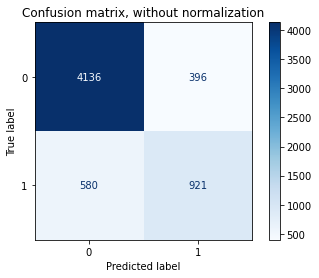

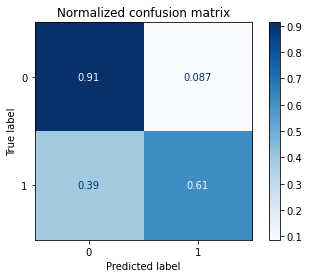

In [32]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

class_names = [0,1]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, x_test_rcf, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

### SVM Model

In [38]:
from sklearn.svm import SVC

In [39]:
def svm_model(k, c, x, y):
    model = SVC(kernel=k, C=c).fit(x, y)
    return model

In [41]:
%%time
model_1_linear = svm_model('linear', 0.1, x_train_rcf, y_train.ravel())

CPU times: user 25min 41s, sys: 4.75 s, total: 25min 45s
Wall time: 25min 56s


In [42]:
print(str('Linear SVM Score Scale : ') + str(model_1_linear.score(x_test_rcf, y_test.ravel())))

Linear SVM Score Scale : 0.7835239515995359


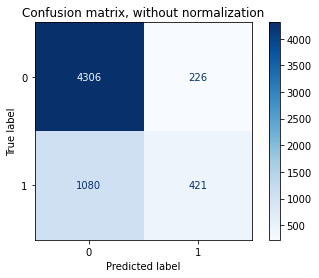

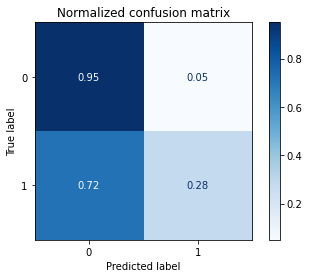

In [43]:

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

class_names = [0,1]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(model_1_linear, x_test_rcf, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()